#  Irisデータセットを読み込み

In [3]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()

data = iris.data[:, [2,3]]
target = iris.target

# データ分割

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=0)

In [5]:
# scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [11]:
from matplotlib.colors import ListedColormap

# コピペ
def plot_decision_regions(X, y, classifier, test_index=None, resolution=0.02):
  markers = ("s"  , "x"   , "o"         , "^"   , "v"   )
  colors  = ("red", "blue", "lightgreen", "gray", "cyan")
  cmap = ListedColormap(colors[:len(np.unique(y))])

  # 決定領域のプロット
  x1_min = X[:, 0].min() - 1
  x1_max = X[:, 0].max() + 1
  x2_min = X[:, 1].min() - 1
  x2_max = X[:, 1].max() + 1
  
  # グリッドポイントの生成
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
  
  # 予測
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)


  plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  for index, cl in enumerate(np.unique(y)):
    plt.scatter(
        x = X[y == cl, 0],
        y = X[y == cl, 1],
        alpha = 0.8,
        c = colors[index],
        marker = markers[index],
        label = cl,
        edgecolor = "black"
    )
  if test_index:
    X_test, y_test = X[test_index, :], y[test_index]
    plt.scatter(X_test[:, 0], X_test[:, 1], c="", edgecolor="black",
                alpha=1.0, linewidth=1, marker="o", s=100, label="test set")

# Logistic regression

train acc: 0.6952380952380952
test acc: 0.6
train acc: 0.9428571428571428
test acc: 0.9555555555555556
train acc: 0.9523809523809523
test acc: 0.9555555555555556
train acc: 0.9523809523809523
test acc: 0.9777777777777777
train acc: 0.9523809523809523
test acc: 0.9777777777777777
train acc: 0.9619047619047619
test acc: 0.9777777777777777
train acc: 0.9619047619047619
test acc: 0.9777777777777777


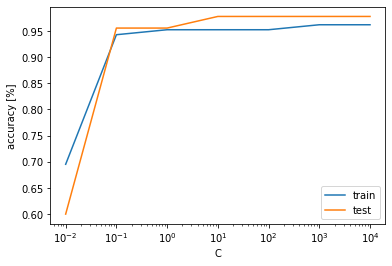

In [6]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

C = [0.01,0.1,1,10,100,1000,10000]

train_accs = []
test_accs = []

# run Logistic Regression with various Cs
for c in C:
    lr = LogisticRegression(C=c, random_state=0)
    lr.fit(X_train_std, y_train)
    train_pred = lr.predict(X_train_std)
    train_ac = np.sum(y_train==train_pred)/len(train_pred)

    test_pred = lr.predict(X_test_std)
    test_ac = np.sum(y_test==test_pred)/len(test_pred)

    print("train acc:", train_ac)
    print("test acc:", test_ac)
    train_accs.append(train_ac)
    test_accs.append(test_ac)

plt.xscale("log")
plt.xlabel("C")
plt.ylabel("accuracy [%]")
plt.plot(C, train_accs, label="train")
plt.plot(C, test_accs, label="test")
plt.legend()
plt.show()

# Linear Support vector machines with sklearn

train acc: 0.6952380952380952
test acc: 0.6
train acc: 0.9523809523809523
test acc: 0.9555555555555556
train acc: 0.9523809523809523
test acc: 0.9777777777777777
train acc: 0.9523809523809523
test acc: 0.9777777777777777
train acc: 0.9523809523809523
test acc: 0.9777777777777777
train acc: 0.9523809523809523
test acc: 0.9777777777777777
train acc: 0.9523809523809523
test acc: 0.9777777777777777


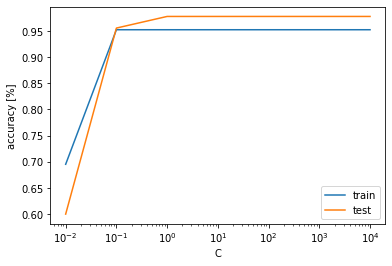

In [7]:
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC


C = [0.01,0.1,1,10,100,1000,10000]

train_accs = []
test_accs = []

# run linear SVM with various Cs
for c in C:
    lr = SVC(kernel="linear", C=c, random_state=0)
    lr.fit(X_train_std, y_train)
    train_pred = lr.predict(X_train_std)
    train_ac = np.sum(y_train==train_pred)/len(train_pred)

    test_pred = lr.predict(X_test_std)
    test_ac = np.sum(y_test==test_pred)/len(test_pred)

    print("train acc:", train_ac)
    print("test acc:", test_ac)
    train_accs.append(train_ac)
    test_accs.append(test_ac)

plt.xscale("log")
plt.xlabel("C")
plt.ylabel("accuracy [%]")
plt.plot(C, train_accs, label="train")
plt.plot(C, test_accs, label="test")
plt.legend()
plt.show()



# Kernel SVMs

**********
C: 0.01
train acc: 0.37142857142857144
test acc: 0.24444444444444444
**********
C: 0.1
train acc: 0.9523809523809523
test acc: 0.9777777777777777
**********
C: 1
train acc: 0.9523809523809523
test acc: 0.9777777777777777
**********
C: 10
train acc: 0.9523809523809523
test acc: 0.9777777777777777
**********
C: 100
train acc: 0.9523809523809523
test acc: 1.0
**********
C: 1000
train acc: 0.9714285714285714
test acc: 0.9777777777777777
**********
C: 10000
train acc: 0.9904761904761905
test acc: 0.9555555555555556


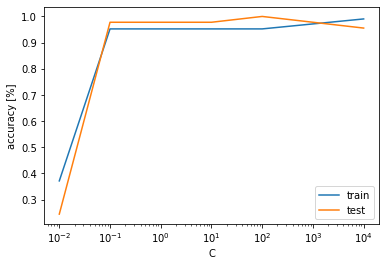

In [9]:
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC


C = [0.01,0.1,1,10,100,1000,10000]

train_accs = []
test_accs = []

# run linear SVM with various Cs
for c in C:
    lr = SVC(kernel="rbf", C=c, random_state=0)
    lr.fit(X_train_std, y_train)
    train_pred = lr.predict(X_train_std)
    train_ac = np.sum(y_train==train_pred)/len(train_pred)

    test_pred = lr.predict(X_test_std)
    test_ac = np.sum(y_test==test_pred)/len(test_pred)

    print("*"*10)
    print("C:", c)
    print("train acc:", train_ac)
    print("test acc:", test_ac)
    train_accs.append(train_ac)
    test_accs.append(test_ac)

plt.xscale("log")
plt.xlabel("C")
plt.ylabel("accuracy [%]")
plt.plot(C, train_accs, label="train")
plt.plot(C, test_accs, label="test")
plt.legend()
plt.show()



**********
G: 0.01
train acc: 0.8952380952380953
test acc: 0.7777777777777778
**********
G: 0.1
train acc: 0.9523809523809523
test acc: 0.9777777777777777
**********
G: 1
train acc: 0.9523809523809523
test acc: 0.9777777777777777
**********
G: 10
train acc: 0.9523809523809523
test acc: 1.0
**********
G: 100
train acc: 0.9904761904761905
test acc: 0.8
**********
G: 1000
train acc: 0.9904761904761905
test acc: 0.6222222222222222
**********
G: 10000
train acc: 0.9904761904761905
test acc: 0.6222222222222222


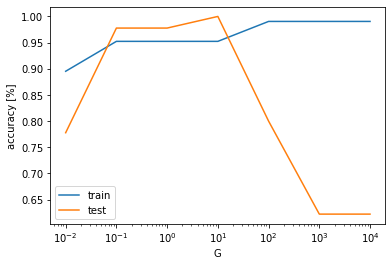

In [10]:
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC


Gamma = [0.01,0.1,1,10,100,1000,10000]

train_accs = []
test_accs = []

# run linear SVM with various gammas
for g in Gamma:
    lr = SVC(kernel="rbf", C=1, gamma=g, random_state=0)
    lr.fit(X_train_std, y_train)
    train_pred = lr.predict(X_train_std)
    train_ac = np.sum(y_train==train_pred)/len(train_pred)

    test_pred = lr.predict(X_test_std)
    test_ac = np.sum(y_test==test_pred)/len(test_pred)

    print("*"*10)
    print("G:", g)
    print("train acc:", train_ac)
    print("test acc:", test_ac)
    train_accs.append(train_ac)
    test_accs.append(test_ac)

plt.xscale("log")
plt.xlabel("G")
plt.ylabel("accuracy [%]")
plt.plot(Gamma, train_accs, label="train")
plt.plot(Gamma, test_accs, label="test")
plt.legend()
plt.show()



# Decision trees

In [19]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion="entropy", max_depth=4, random_state=0)
tree.fit(X_train, y_train)

train_pred = tree.predict(X_train)
train_ac = np.sum(y_train==train_pred)/len(train_pred)

test_pred = tree.predict(X_test)
test_ac = np.sum(y_test==test_pred)/len(test_pred)

print("train acc:", train_ac)
print("test acc:", test_ac)

train acc: 0.9809523809523809
test acc: 0.9777777777777777


# Random forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
tree = RandomForestClassifier(criterion="entropy", n_estimators=100, random_state=0, max_depth=5)
tree.fit(X_train, y_train)

train_pred = tree.predict(X_train)
train_ac = np.sum(y_train==train_pred)/len(train_pred)

test_pred = tree.predict(X_test)
test_ac = np.sum(y_test==test_pred)/len(test_pred)

print("train acc:", train_ac)
print("test acc:", test_ac)

train acc: 0.9904761904761905
test acc: 0.9777777777777777
